<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2006%20-%20Boundary%20Value%20Problems/602_Non-Linear%20Shooting%20Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-Linear Shooting Method
#### John S Butler john.s.butler@tudublin.ie   [Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)

## Overview
This notebook illustates the implentation of a the non-linear shooting method to a non-linear boundary value problem.

The non-linear shooting method is a bit like the game Angry Birds to make a first guess and then you refine.
The video below walks through the code.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/B7MQe09lDC4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/johnbutler/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Introduction
To numerically approximate the non-linear Boundary Value Problem
\begin{equation}
y^{''}=f(x,y,y^{'}), \ \ \ a < x < b, \end{equation}
with the boundary conditions$$y(a)=\alpha,\end{equation} and
\begin{equation}y(b) =\beta,\end{equation}
using the non-linear shooting method, the Boundary Value Problem is divided into two Initial Value Problems:
1. The first 2nd order non-linear Initial Value Problem is the same as the original Boundary Value Problem with an extra initial condtion $y_1^{'}(a)=\lambda_0$. 
\begin{equation}
 y^{''}_1=f(x,y,y^{'}), \ \    y_1(a)=\alpha, \ \ \color{red}{y^{'}_1(a)=\lambda_0},\\
\end{equation}
2. The second 2nd order Initial Value Problem is with respect to $z=\frac{\partial y}{\partial \lambda}$  with the initial condtions $z(a)=0$ and $z^{'}(a)=1$.

\begin{equation}
z^{''}=\frac{\partial f}{\partial y^{'}}z^{'}(x,\lambda)+\frac{\partial f}{\partial y}z(x,\lambda), \ \ \color{green}{z(a)=0, \ \ z^{'}(a)=1}.
\end{equation}
combining these results together to get the unique solution 
\begin{equation}
y(x)=y_1(x).
\end{equation}
Unlike the linear method, the non-linear shooting method is iterative to get the value of $\lambda$ that results in the same solution as the Boundary Value Problem.

The first choice of $\lambda_0$ is a guess, then after the first iteration a Newton Raphson method is used to update $\lambda,$ 

\begin{equation}\lambda_k=\lambda_{k-1}-\frac{y_1(b,\lambda_{k-1})-\beta}{\frac{dy}{d \lambda}(b,\lambda_{k-1})},$$
which can be re-written as,
\begin{equation}\lambda_k=\lambda_{k-1}-\frac{y_1(b,\lambda_{k-1})-\beta}{z(b,\lambda_{k-1})},$$

until $|\lambda_{k}-\lambda_{k-1}|<tol$.

The introduction of $\lambda$ is the introduction of a new variable that motivates the second 2nd order Initial Value Problem.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Example Non-linear Boundary Value Problem
To illustrate the shooting method we shall apply it to the non-linear Boundary Value Problem:
\begin{equation} y^{''}=-2yy^{'}, \end{equation}
with boundary conditions
\begin{equation}y(0) = -2.5, \end{equation}
\begin{equation}y(1) = 3. \end{equation}
The __boundary value problem__ is broken into two second order __Initial Value Problems:__
1. The first 2nd order Initial Value Problem is the same as the original Boundary Value Problem with an extra initial condtion $y^{'}(0)=\lambda_0$.
\begin{equation}
u^{''} =-2uu', \ \ \ \ u(0)=-2.5, \ \ \ \color{green}{u^{'}(0)=\lambda_0},
\end{equation}

which can be written a two first order initial value problems
\begin{equation}
u_1^{'} =u_2, \ \ \ \ u_1(0)=-2.5,
\end{equation}
\begin{equation}
u_2^{'} =-2u_1u_2, \ \ \ \ \color{green}{u_2^{'}(0)=\lambda_0}.
\end{equation}


2. The second 2nd order Initial Value Problem  $z=\frac{\partial y}{\partial \lambda}$  with the initial condtions $z(a)=0$ and $z^{'}(a)=1$.with the initial condtions $z^{'}(0)=0$ and $z^{'}(0)=1$.
\begin{equation}
z^{''} =-2y^{'}z-2yz^{'}, \ \ \ \ \color{green}{z(0)=0}, \ \ \ \color{green}{z^{'}(0)=1}
\end{equation}
which can be written a two first order initial value problems
\begin{equation}
z_1^{'} =z_2, \ \ \ \ z_1(0)=0,
\end{equation}
\begin{equation}
z_2^{'} =-2u_2z_1-2u_1z_2, \ \ \ \ \color{green}{z_2^{'}(0)=1}.
\end{equation}

The first choice of $\lambda$ we guess $\lambda_0=0.2$. Then after the first iteration a Newton Raphson method is used to update $\lambda$ 

\begin{equation}\lambda_k=\lambda_{k-1}-\frac{u_1(1,\lambda_{k-1})-3}{z_1(1,\lambda_{k-1})}\end{equation}
until $\lambda_{k}-\lambda_{k-1}<0.001$.


## Discrete Axis
The stepsize is defined as
\begin{equation}h=\frac{b-a}{N}\end{equation}
here it is 
\begin{equation}h=\frac{1-0}{10}\end{equation}
giving 
\begin{equation}x_i=0+0.1 i\end{equation}
for $i=0,1,...10.$
The plot shows the discrete time intervals.

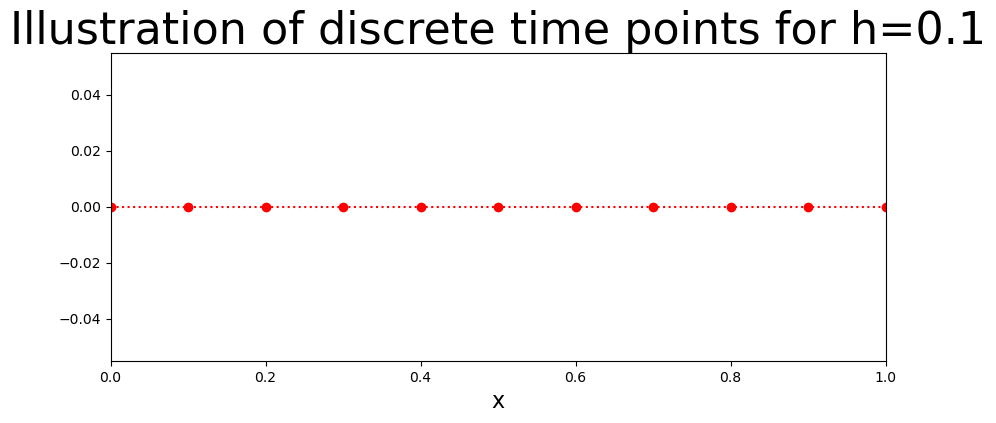

In [3]:
## BVP
N=10
h=1/N
x=np.linspace(0,1,N+1)
fig = plt.figure(figsize=(10,4))
plt.plot(x,0*x,'o:',color='red')
plt.xlim((0,1))
plt.xlabel('x',fontsize=16)
plt.title('Illustration of discrete time points for h=%s'%(h),fontsize=32)
plt.show()

## Initial conditions
The initial conditions for the discrete equations are:
\begin{equation} u_1[0]=-2.5\end{equation}
\begin{equation} u_2[0]=\lambda_0\end{equation}
\begin{equation} z_1[0]=0\end{equation}
\begin{equation} z_2[0]=1\end{equation}
\begin{equation}\beta=3\end{equation}
Let $\lambda_0=0.2$


In [4]:
U1=np.zeros(N+1)
U2=np.zeros(N+1)
Z1=np.zeros(N+1)
Z2=np.zeros(N+1)

lambda_app=[0.2]
U1[0]=-2.5
U2[0]=lambda_app[0]

Z1[0]=0
Z2[0]=1
beta=3

## Numerical method
The Euler method is applied to numerically approximate the solution of the system of the two second order non-linear initial value problems they are converted in to two pairs of two first order non-linear initial value problems:
1. Discrete form of Equation 1
\begin{equation}u_{1 }[i+1]=u_{1}[i] + h u_{2 }[i]\end{equation}
\begin{equation}u_{2 }[i+1]=u_{2 }[i] + h (-2u_{1}[i]u_{2 }[i])\end{equation}
with the initial conditions $u_{1}[0]=-2.5$ and $u_{2}[0]=\lambda_0.$


2. Discrete form of Equation 2
\begin{equation}z_{1}[i+1]=z_{1 }[i] + h z_{2 }[i]\end{equation}
\begin{equation}z_{2}[i+1]=z_{2 }[i] + h (-2z_{2}[i]y_{1 }[i]-2z_{1 }[i] y_{2 }[i])\end{equation}
with the initial conditions $z_{1}[0]=0$ and $z_{2}[0]=1$.

At the end of each iteration 
\begin{equation} u_1[i] \approx y(x_i).\end{equation}
The initial choice of $\lambda_0=0.2$ is up to the user then for each iteration of the system $\lambda$ is updated using the formula:
\begin{equation}\lambda_k=\lambda_{k-1}-\frac{u_1[10]-3}{z_1[10]}.\end{equation}

The plot below shows the numerical approximation of the solution to the non-linear Boundary Value Problem for each iteration.

The stopping criteria for the iterative process is
\begin{equation}|\lambda_k-\lambda_{k-1}|<tol,\end{equation}
with $tol=0.0001.$

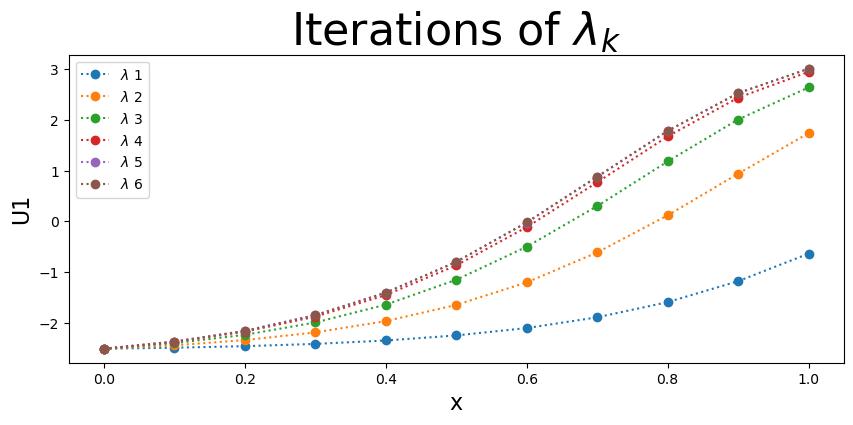

In [5]:
tol=0.0001
k=0
fig = plt.figure(figsize=(10,4))
while  k<20:
    k=k+1
    for i in range (0,N):
        U1[i+1]=U1[i]+h*(U2[i])
        U2[i+1]=U2[i]+h*(-2*U2[i]*U1[i])
    
        Z1[i+1]=Z1[i]+h*(Z2[i])
        Z2[i+1]=Z2[i]+h*(-2*U2[i]*Z1[i]-2*Z2[i]*U1[i])

    lambda_app.append(lambda_app[k-1]-(U1[N]-beta)/Z1[N])
   
    plt.plot(x,U1,':o',label=r"$\lambda$ %s"%(k))
    plt.xlabel('x',fontsize=16)
    plt.ylabel('U1',fontsize=16)
    U2[0]=lambda_app[k]
    if abs(lambda_app[k]-lambda_app[k-1])<tol:
        break
        
plt.legend(loc='best')
plt.title(r"Iterations of $\lambda_k$",fontsize=32)
plt.show()

## Results
The plot below shows the final iteration of the numerical approximation for the non-linear boundary value problem.

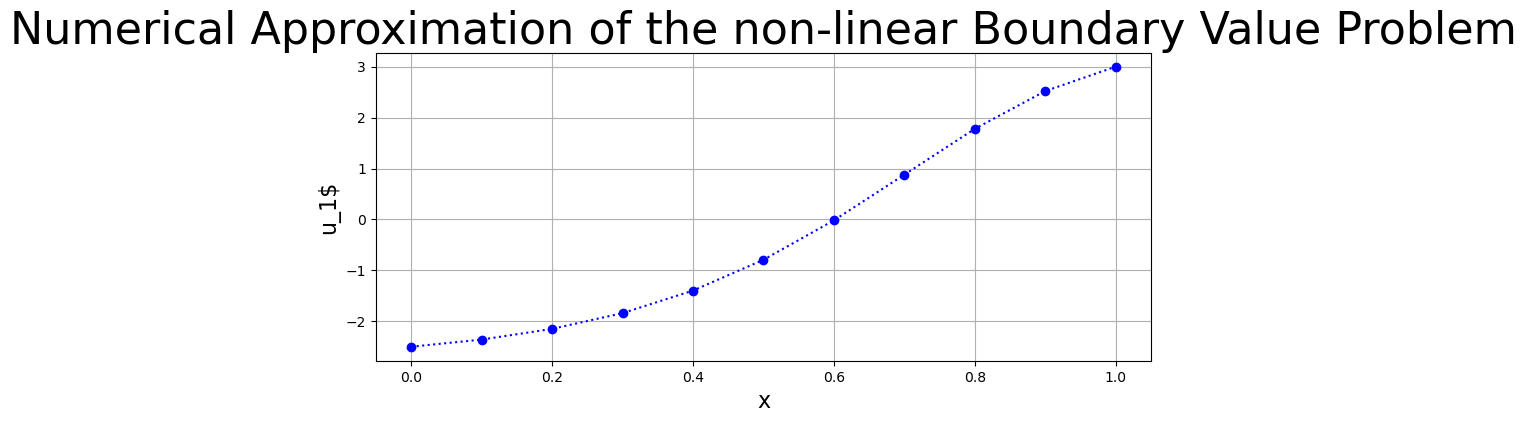

In [6]:
fig = plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(x,U1,'b:o')
plt.title("Numerical Approximation of the non-linear Boundary Value Problem",fontsize=32)
plt.xlabel('x',fontsize=16)
plt.ylabel("u_1$",fontsize=16)
plt.show()


## $\lambda$ Iteration
The plot below shows the iterations of $\lambda_k$, after $4$ iterations the value of $\lambda$ stabilies.

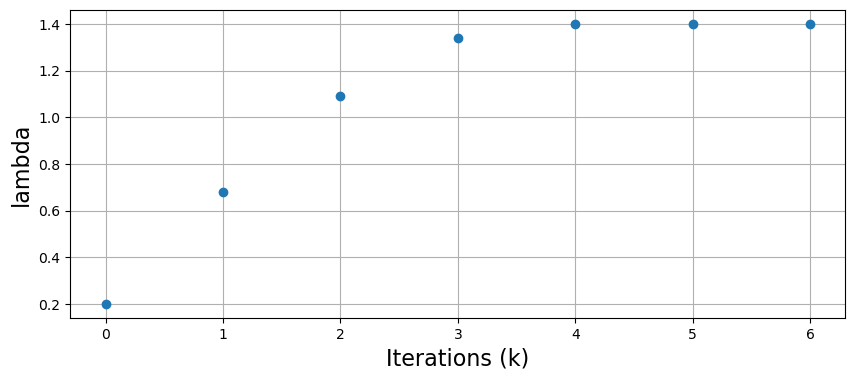

In [7]:
fig = plt.figure(figsize=(10,4))
plt.grid(True)
plt.plot(lambda_app,'o')
#plt.title("Values of $\lambda$ for each interation ",fontsize=32)
plt.xlabel('Iterations (k)',fontsize=16)
plt.ylabel("lambda",fontsize=16)
plt.show()